In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

firstRSDRPath = r'P:\projects\RC10_ResultsSets\RSDRs'
secondRSDRPath = r'P:\projects\RC11_ResultsSets\RSDRs'

firstRSDRID = 'RC2019'
secondRSDRID = 'RC2020'

fileEnd = ".csv"

regionBasins = {'BM':'Burnett Mary', 'BU':'Burdekin', 'CY':'Cape York', 'FI':'Fitzroy',
                'MW':'Mackay Whitsundays', 'WT':'Wet Tropics'}



In [5]:
pairs = {}

for fname in glob.glob(firstRSDRPath + '/*' + fileEnd):
    #print(fname)
    bname = os.path.basename(fname)
    #print("base: " + bname)
    
    regCode = bname[:2]
    #print(regCode)
    
    #Find constituent
    dotPlace = bname.rfind(".")
    #print(dotPlace)
    startPlace = 8 + (len(firstRSDRID) + 1)
    constituent = bname[startPlace:dotPlace]
    #print(constituent)
    
    othername = bname.replace(firstRSDRID, secondRSDRID)
    
    checkFile = os.path.join(secondRSDRPath, othername)
    
    #print("Looking for: " + checkFile)
    
    if os.path.exists(checkFile):
        #print("found it")
        
        if not constituent in pairs:
            #print("Adding: " + constituent)
            pairs[constituent] = {}
        
        if not regCode in pairs[constituent]:
            #print("Adding " + regCode + " to " + constituent)
            pairs[constituent][regCode] = {}
        
        pairs[constituent][regCode][firstRSDRID] = fname
        pairs[constituent][regCode][secondRSDRID] = checkFile
            
    
    """  
    ff = os.path.splitext(name)
    print(len(ff))
    for i in range(0,len(ff)):
        print(str(i) + ": " + ff[i])
    """   
print("ready to go")

ready to go


In [6]:
#print(pairs)

Burnett Mary N_DIN:


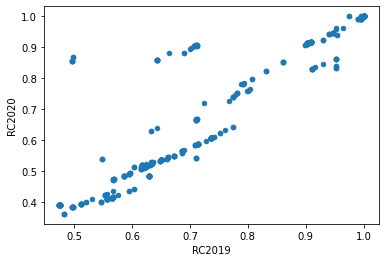

Burdekin N_DIN:


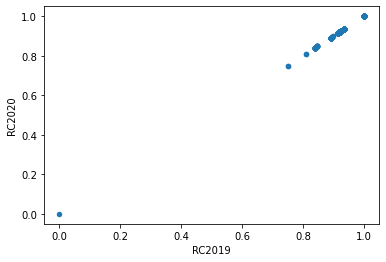

Cape York N_DIN:


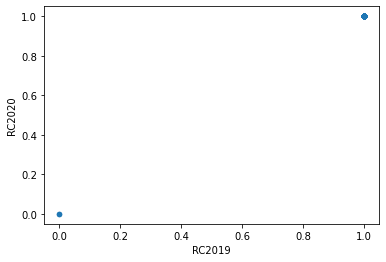

Fitzroy N_DIN:


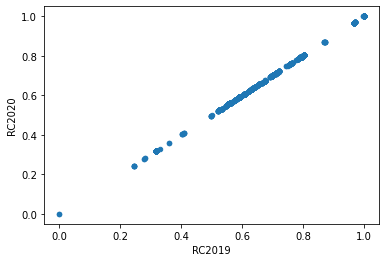

Mackay Whitsundays N_DIN:


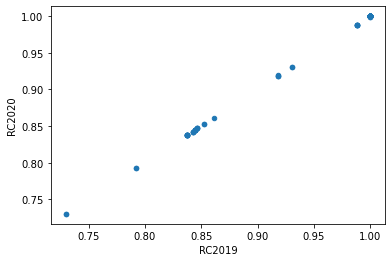

Wet Tropics N_DIN:


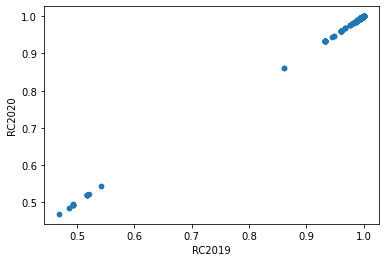

Burnett Mary Sediment - Fine:


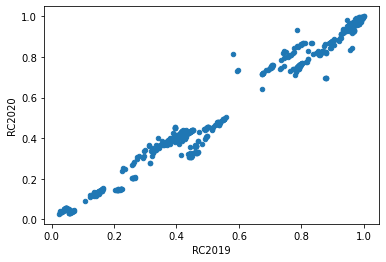

Burdekin Sediment - Fine:


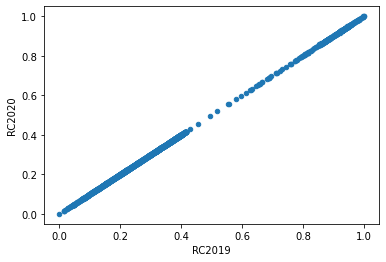

Cape York Sediment - Fine:


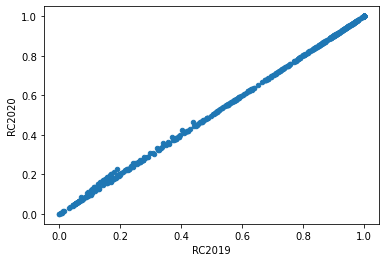

Fitzroy Sediment - Fine:


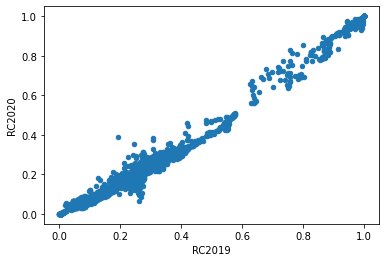

Mackay Whitsundays Sediment - Fine:


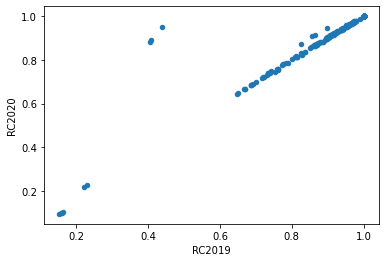

Wet Tropics Sediment - Fine:


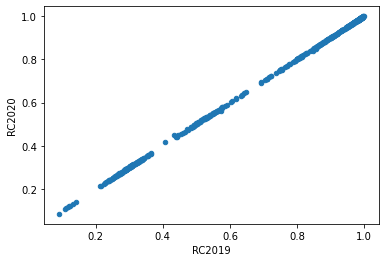

In [7]:
for const in pairs:
    for reg in pairs[const]:
        df1 = pd.read_csv(pairs[const][reg][firstRSDRID])
        df1.rename(columns={'RSDR':firstRSDRID}, inplace=True)
        df2 = pd.read_csv(pairs[const][reg][secondRSDRID])
        df2.rename(columns={'RSDR':secondRSDRID}, inplace=True)
        
        print(regionBasins[reg] + " " + const + ":")
        df3 = pd.merge(df1, df2, how='left', left_on=['SubCatch'], right_on=['SubCatch'])
        df3.plot(x =firstRSDRID, y=secondRSDRID, kind = 'scatter')
        plt.show()